<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/COMP4980ML_W22_NN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn.neural_network as nn
import sklearn.model_selection as ms
import matplotlib.pyplot as plt

Adapted from:
https://stackabuse.com/creating-a-neural-network-from-scratch-in-python

Also good:
https://developer.ibm.com/technologies/artificial-intelligence/articles/neural-networks-from-scratch/

Most detailed:
https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

In [ ]:
def sigmoid(x, derivative = False):
  if(derivative):
    return sigmoid(x) * (1-sigmoid(x))
    
  return 1/(1+np.exp(-x))

In [ ]:
def ReLu(x, derivative = False):
  x[ x < 0 ] = 0

  if(derivative):
    x[ x > 0 ] = 1
  
  return x

In [ ]:
leak = 0.2
def LeakyReLu(x, derivative = False):
  if(derivative):
    x[ x >= 0 ] = 1
    x[ x < 0 ] = leak
    return x
  
  x[ x < 0 ] *= leak
  return x

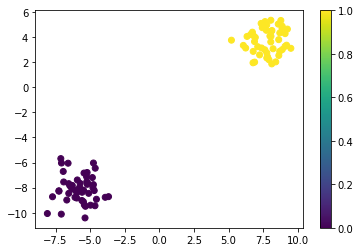

In [ ]:
from sklearn.datasets import make_moons, make_blobs
#X, y = make_moons(noise=.1)
X, y = make_blobs(centers=2)
y = y.reshape(-1,1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
layer_sizes = [2, 40, 20, 1]
depth = len(layer_sizes) - 1
weights = []
bias = []
for n in range(depth):
  weights.append( np.random.rand( layer_sizes[n], layer_sizes[n+1] )    )
  bias.append( np.random.rand( layer_sizes[n+1] ) )

lr = 0.00005
activation = ReLu


In [ ]:
bias

[array([0.33399099, 0.82823584, 0.02247177, 0.28413022, 0.72019209,
        0.62191801, 0.95063686, 0.29328887, 0.82436011, 0.20334427,
        0.08561047, 0.16205894, 0.73707386, 0.74729472, 0.73914923,
        0.47715838, 0.92877564, 0.84637103, 0.85150325, 0.74534445]),
 array([0.15441777])]

In [ ]:
def feedforward(input):
  outputs = [input]

  for n in range(depth):
    if(n== depth-1):
      newVals = sigmoid(  np.dot(outputs[n], weights[n]) + bias[n] )
    else:
      newVals = activation(  np.dot(outputs[n], weights[n]) + bias[n] )
    outputs.append(newVals)
  
  return outputs

In [ ]:
def backpropagate( values, labels, prnt = False):
  error = values[depth] - labels
  gradient = activation( values[depth], derivative=True )
  error *= gradient

  if(prnt):
    print(error.sum())
  
  errors = [error]

  for n in range(depth-1, 0, -1):
    error = np.dot(error, weights[n].T)
    gradient = activation( values[n], derivative = True )
    error *= gradient
    errors.insert(0 ,error)
    
  return errors

In [ ]:
def updateWB(errors, values):
  for n in range(depth):
    update = np.dot(values[n].T, errors[n])
    update *= lr

    weights[n] = weights[n] - update
    bias[n] = bias[n] - lr * sum(sum(errors[n]))

In [ ]:
for epoch in range(10000):
  values = feedforward(X_train)

  errors = backpropagate(values, y_train, prnt = epoch % 1000 == 0)

  updateWB(errors, values)

46.850580905712725
8.986279824553087
2.3078055710876475
1.1457002633620945
0.05914189865025435
0.024601780246936107
0.015243281825347371
0.01095244135137309
0.008508100551020468
0.006935965762673998


In [ ]:
y_pred = feedforward( X_test )
y_pred = np.round_( y_pred[depth], 0 )

In [ ]:
y_pred

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0